In [1]:
import numpy as np
import scipy.linalg as la
import scipy.sparse.linalg as sla

import matplotlib.pyplot as plt

In [26]:
n = 100
A = np.random.randn(n,n)
b = np.random.randn(n)

In [34]:
ilu = la.ilu(A)
M_x = lambda x: ilu.solve(A)

AttributeError: module 'scipy.linalg' has no attribute 'ilu'

In [33]:
x, info = sla.bicgstab(A,b,tol=1e-10, maxiter=10**6)

In [28]:
print(la.norm(b - A@x))
print(info)

34917.249633277104
-10


In [8]:
info

-10

In [36]:
iters = [0]
errors = []
x = np.ones(5)


r = b - A@x
errors += [la.norm(r)]
rh = r
ro_m = 1
alpha = 1
om = 1
v = np.zeros(np.shape(r))
p = np.zeros(np.shape(r))
for i in range(100):
    ro = np.dot(rh, r)
    beta = ro*alpha/(ro_m*om)
    p = r + beta*(p - om*v)
    v = A@p
    alpha = ro/np.dot(rh, v)
    s = r - alpha*v
    t = A@s
    om = np.dot(t,s)/np.dot(t,t)
    x += alpha*p + om*s
    r = s - om*t
    iters.append(i)
    errors.append(la.norm(r))

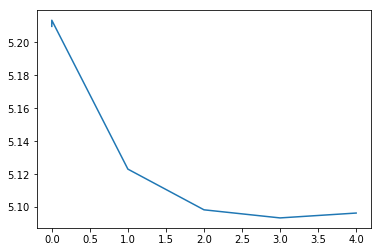

In [119]:
n = 5
A = np.random.randn(n,n)
b = np.random.randn(n)

iters = [0]
errors = []

x = np.ones(n)
xh = np.random.randn(n)
bh = np.ones(n)
r = b - A@x
errors.append(la.norm(r))
rh = bh - A@xh
p = r
ph = rh

for k in range(n):
    alpha = np.dot(rh,r)/(np.dot(ph, A@p))
    x += alpha*p
    xh += alpha*ph
    beta = np.dot(rh, r)
    r -= alpha* A@p
    rh -= alpha * A@ph
    beta = np.dot(rh, r)/beta
    p = r + beta*p
    ph = rh + beta*ph
    iters.append(k)
    errors.append(la.norm(r))

plt.plot(iters, errors)


In [137]:
n = 5
A = np.random.randn(n,n)
b = np.random.randn(n)

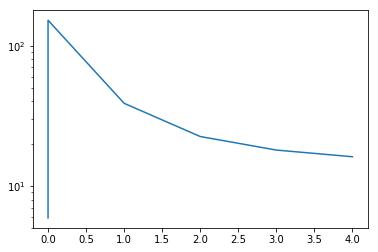

In [138]:
iters = [0]
errors = []
x = np.ones(5)
r = b - A@x
errors += [la.norm(r)]


rh = r
ro = 1
ro_m = 1
alpha = 1
om = 1
v = np.zeros(np.shape(r))
p = np.zeros(np.shape(r))
for i in range(n):
    ro = np.dot(rh, r)
    beta = (ro/ro_m)*(alpha/om)
    p = r + beta*(p - om*v)
    v = A@p
    alpha = ro/np.dot(rh, v)
    s = r - alpha*v
    t = A@s
    om = np.dot(t,s)/np.dot(t,t)
    x += alpha*p + om*s
    r = s - om*t
    iters.append(i)
    errors.append(la.norm(r))
    
plt.semilogy(iters, errors)

In [13]:
def BiCGSTAB(A, b, x_0, tol=1e-10):
    x = x_0
    r = b - A@x
    rh = r
    ro_m = 1
    alpha = 1
    om = 1
    v = np.zeros(np.shape(r))
    p = np.zeros(np.shape(r))
    for i in range(len(A)):
        ro = np.dot(rh, r)
        beta = ro*alpha/(ro_m*om)
        p = r + beta*(p - om*v)
        v = A@p
        alpha = ro/np.dot(rh, v)
        s = r - alpha*v
        t = A@s
        om = np.dot(t,s)/np.dot(t,t)
        x += alpha*p + om*s
        r = s - om*t
        
    return x